<img src="Images/numpy.png" width="450"> 

<br>

# The NumPy.random package
[Official Documentation [9]](https://numpy.org/doc/stable/reference/random/index.html)
***  

<br>

## Assignment Objectives
- Explain the overall purpose of the numpy.random package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

<br>

### Overall purpose of the package

#### numpy (Version 1.21)
NumPy (Numerical Python) is a very popular open source library comprised of multi-dimensional array objects, mathematical functions, linear algebra<br>
routines, random number generators and more [20]. The library is very popular due to its high level syntax and ability to perform rapid data operations.<br>
One can explain the speed by looking deeper at how the package operates. Data structures known as ndarrays (N-dimensional arrays) only accept data of<br>
the same type and then map these data structures to highly optimised C compiled code [2]. As Soklaski (2020) describes, this process of vectorization is<br>
so effective when compared to iterating lists and tuples as the ndarrays dont have to check every elements data-type on iteration, resulting in a process<br>
that is orders of magniture faster.<br> 

NumPy's operational speed and inherent mathematical functions make the package of great utility for tasks that involve numerical processing on large<br>
datasets, such as Machine Learning. The package also provides a very useful module for generating random numbers that will now be explored, a package<br>
named *numpy.random*.

<br>

#### numpy.random

This sub-module has the ability to produce pseudo-random sequences and model chosen statistical distribtions, which can be powerful when applied to data<br>
science or machine learning applications. Considering that certain real world phenomena follow predictable distibutions when the sample size is of sufficient<br> 
scale, one can generate a model and make predictons. An example of this would be modelling population as a *normal distribtuion* (bell-curve shape) and using<br> 
this model to make predictions on real-world data.

As per the offical documnetation the random sub-module functions can be categorized into the following: <br>
- *Simple random data* functions that can generate pseudo-random data arrays. 
- *Permutations* function that are used to randomly modify a sequence.
- *Distribution* functions that use randomly generated arrays to sample from a chosen statistical distribtuion.<br>

<br>

### Simple random data
***
As per the offical documentation, the approach of numPy V1.21 to generating random numbers consists of using a *BitGenerators* and a *random generator*.<br> 
The BitGenerators produces an array of random bits which which are passed to a generator, which can be used to model different probability distributions.<br>
One can call the *default_rng()* constructor to instansiate an object of the Generator Class and then apply *simple random data* functions that belong to the class.<br>
Before exploring the simple random data functions lets import the relevant libraries and instansiate our generator for use throughout this notebook.

In [1]:
# import libraries
%matplotlib inline                      
import numpy as np                          # for numerical operations
import pandas as pd                         # for manipulating data arrays 
import statistics                           # to perfom some stats on arrays
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting



# Construct new Generator and store in rng variable
# Uses default BitGenerator (PCG64)
rng = np.random.default_rng()

In [2]:
plt.rcParams['font.size'] = 13              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default plot font size 

<br>

#### Random Generator Functions

This version of NumPy recommends two random number generating functions that can be utilised when one accesses the Generator via *np.random.default_rng()*. <br>
Both functions produce random numbers from the uniform distribution. In other words, all outcomes are equally likely and can produce a symmetric probability <br>
distribution when the sample size is of sufficient scale, see the two functions below.

- ***generator.integers()*** <br>
Produces random integers from a "discrete" uniform distribution. This means that any symmetric probability distriubtion has a finite number of values [12].<br>
This makes sense as the function produces whole numbers. See *Figure 1* below and the code used to generate the histogram to see the uniformity of the<br>
distribution and how it increases with a larger sample size.<br>
- ***generator.random()*** <br>
Produces random floating point numbers from a “continuous" uniform distribution, i.e : a symmetric probability distriubtion that has an infinite number of<br> 
possible values [12]. This also makes sense as the function can produce an infinite range of numbers (floats).

                             data type check :int64


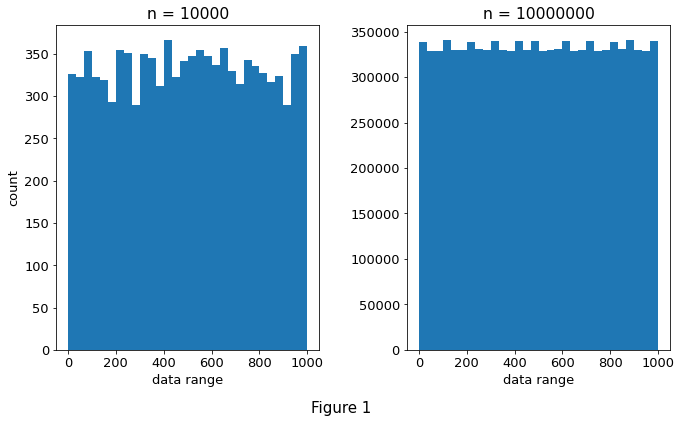

In [3]:
def plot_hist_twice(array_one, array_two, title_one, title_two, fig_ref):
    
    # generate figure with 1 row and two cols on subplots grid
    fig, axs = plt.subplots(1, 2, sharex = True, sharey = False)
    plt.figtext(0.5, 0.0, fig_ref, wrap = True, horizontalalignment = 'center', fontsize = 15)  
    
    # plot histogram on each column
    axs[0].hist(array_one, density = False, bins = 30, rwidth = 10)                   
    axs[1].hist(array_two, density = False, bins = 30, rwidth = 10)
          
    # loop over axes objects in the figure 
    for plot_index, ax in enumerate(fig.axes):          
        ax.set_xlabel('data range')   
        #ax.tick_params(axis='both', labelsize = 15)
        
        if plot_index < 1:     
            ax.set_title(str(title_one))  
            ax.set_ylabel('count')
        else:     
            ax.set_title(str(title_two))    
    fig.tight_layout(pad = 2)
    plt.show()

# Call integers function on generator and pass n values  
# of range 0 (inclusive) to 1001 (exclusive) and dtype int64    
small_array = rng.integers(1001, size = 10000)     
large_array = rng.integers(1001, size = 10000000)   

# check data type
print(' '*28, 'data type check :' + str(small_array.dtype))

# Pass variables to hist function
plot_hist_twice(small_array, large_array, 'n = 10000', 'n = 10000000', 'Figure 1')




<br>

#### Choice Function
This function can:
- Create a random array similar to the *np.arange()* function.
- Generate or selects a random sample from a given 1-darray or list. As per the documentation the choice method samples from a uniform distribution,<br>
 one can pass a probability list / array to alter this distribution (Reference Figure 2).

In [4]:
# randomly select 10 numbers between 0 - 10
rand_array = rng.choice(11, size = 10)     # acts like np.arange(n)
rand_array 

array([0, 6, 1, 6, 0, 4, 1, 9, 6, 1], dtype=int64)

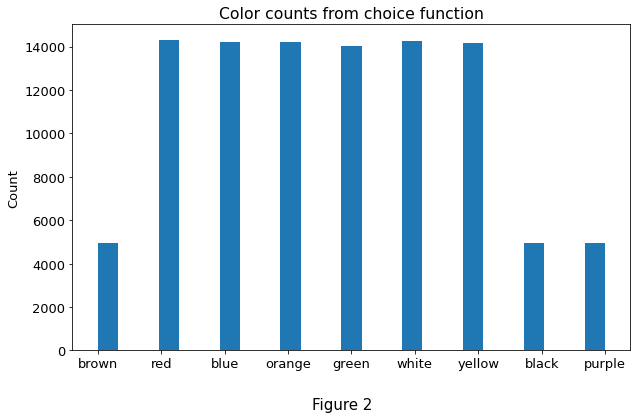

In [5]:

# This cell will explore the choice methods ability to sample from a uniform distribution
# and its p (probability) parameter
colors = ['blue', 'black', 'green', 'red', 'yellow', 'orange', 'purple', 'brown', 'white']
selections = []
selections_weighted = []
probabilities = []

# append choices from color list to selections list
for i in range(10000):
    selection = rng.choice(colors) 
    selections.append(selection)
    
 
    # make weighted proability list 
for color in colors:
    if color in ['black', 'brown', 'purple']:
        probabilities.append(0.05)
    else:
        probabilities.append(0.85 / 6)
        
    # make choices over large range
for i in range(100000):
    selection_weighted = rng.choice(colors, p = probabilities)      # pass weighted probability list to choice()  
    selections_weighted.append(selection_weighted)                  # append choices to weighted list

# plot hisrogram 
plt.hist(selections_weighted, bins = 25)     
plt.figtext(0.5, -0.01, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15)  
plt.title('Color counts from choice function')  
plt.xticks(colors)
plt.ylabel('Count')
#plt.tight_layout(pad = 2)
plt.show()

**Figure 2**: Shows a uniform distribution for blue, green, red, yellow, orange, white. One can see the choice method selected black, brown and purple less <br>
frequently as each item had a probability of circa 5% (0.05 in code), despite being uniformly selected relative to eachother.

<br>

### Pemutation Functions
When dealing with ndarrays, one can think of a permutation as any possible arrangment of the elements in that array [13]. NumPy offers three different <br>
permutation functions that can randomly re-arrange the element sequence of the given array, these functions will be explored in more detail below. <br>

<br>

**Some uses in Machine Learning:**   
1. Shuffling can be used to reduce the variance and prevent a given model from learning irrelevant noise through its training dataset which would in turn<br>
effects its ability to accurately predict new data (overfitting)[9]. Calomme (2017) describes how in a in regular stochastic gradient descent one should<br>
shuffle theirdata after each epoch to keep model learning without selection bias. <br> <br>
2. In a Machine Learning model feature importance is of great interest as it informs the data scientist what features have the greatest impact on a models<br>
ability to make accurate predictions. One can deduce information on features importance by randomly shuffling selected selected values and observing the<br>
new predicitions of the model relative to its original predictions. Billiau (2021) describes how a small decrease in model accuracy suggests that the shuffled<br>
data is not contributing heavily to your models ability to predict outcomes. The process can be very useful when correctly applied accross all features as<br>
one can now rank order the featues by importance.

In [6]:
# template array
array = np.arange(15).reshape((3, 5))
print('Template Array')
print(array)

# axis = 0 shuffles rows
# axies = 1 shuffles columns

# shuffle template along rows 
rng.shuffle(array, axis = 0)                     
print('\nShuffled sub arrays along first axis, i.e: shuffles the contents of the columns\
\nInplace always True')
print(array)


# define new array and shuffle along columns
array = np.arange(15).reshape((3, 5))                                             
array_cols_permutation = rng.permutation(array, axis = 1)
print('\nPermutation of sub arrays along first axis, i.e: shuffles the column positions\
\nGenerates Copy')
print(array_cols_permutation)


# template passed to permuted function (axis = 0)
array_permuted_cols = rng.permuted(array, axis = 0)  
print('\nPermuted Array  axis = 0\nShuffles columns contents')
print(array_permuted_cols)


# template passed to permuted function (axis = 1)
array_permuted_rows = rng.permuted(array, axis = 1)  
print('\nPermuted Array: axis = 1\nShuffles row contents')
print(array_permuted_rows)

Template Array
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Shuffled sub arrays along first axis, i.e: shuffles the contents of the columns
Inplace always True
[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]]

Permutation of sub arrays along first axis, i.e: shuffles the column positions
Generates Copy
[[ 4  0  2  3  1]
 [ 9  5  7  8  6]
 [14 10 12 13 11]]

Permuted Array  axis = 0
Shuffles columns contents
[[10 11 12  8  4]
 [ 0  1  2  3  9]
 [ 5  6  7 13 14]]

Permuted Array: axis = 1
Shuffles row contents
[[ 2  1  3  4  0]
 [ 9  8  7  6  5]
 [14 11 13 10 12]]



<br>

### Probability Distributions
A probability distribution is a function that describes all of the possible outcomes of a random variable along with their corresponding probability values [6].<br>
The numPy package provides a range of subroutines that can model important statistical distributions. These subroutine can be accessed by calling the <br>
default_rng() constructor to instansiate an object of the Generator Class and calling the distribution subroutine on the object.<br>

The ability to sample random data from chosen distribution is of great benifit as one can model different scenarios if they have information on the distribution<br>
subroutine input parameters. The ease of access to probability distributions allows one to predict or calculate the probabilies of defined outcomes. <br>
Brooks-Bartlett (2018) breaks down the different types of probability predictor functions into:
- Probability Mass Function (PMF): Represents discrete probability distributions and can calculate probability of an outcome.
- Probability Density Function (PDF): Represents continuous probability distributions and can calculate probability over a range by integrating the area under a<br>
curve.

Onnen (2021) describes how data scientists can join the dots of the 3-point-estimation technique to avoid business pitfalls, i.e: model the best case, likely case<br>
and worst case to help describe possible outcomes with their associated probabilities. Key distributions offered by numPy will now be explored.


<br>

#### Uniform distribution
##### Function Usage
*Syntax: random.Generator.uniform(low = 0.0, high = 1.0, size = None)* <br>

This function draw random samples from a uniform distribution. It accepts 3 parameters:
- *low*: lower boundary of output interval (inclusive).
- *high*: upper value of output interval(inclusive).
- *size*: shape of output array in the form of number of samples : number of arrays.


##### Distribution Description 
The uniform distrubtion corresponds to models where all outcomes are equally likely (non-biased). The distribution can be a continuous or discrete distribution,<br>
however numPy's uniform function draws samples from a continuous uniform distribtion as it generates float values. NumPys uniform function will be used to<br>
generate an array and its output will compared to the random float generator (See Fig 3 below). <br>


<br>

##### Probability Density Function
<h3>PDF (normal): &nbsp;  $P(x)=\frac{1}{b - a}$ <h3>



           This plot shows that numPys uniform and random float generators 
           both draw floats from a uniform distribution that align with the 
           probability mass function. The standard dev of both numPy
           methods are comparable. The only difference between the methods
           is that the random function limits you to drawing from a standard
           uniform distribution whearas the uniform function allows you allows
           you to sample from any number range across n dimensions.



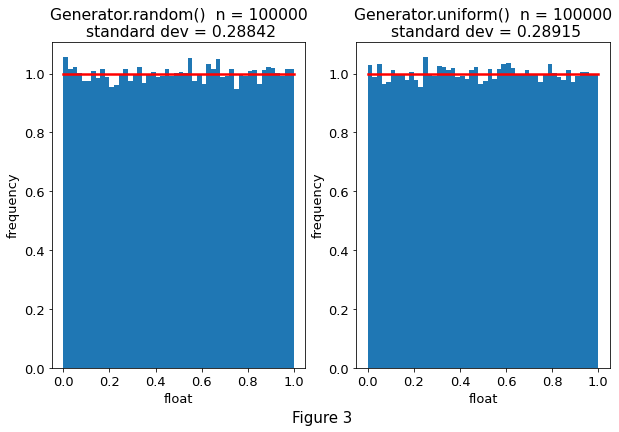

In [7]:
# generate array from standard uniform distribution
a = 0
b = 1
numb_runs = 100000
uniform_array = rng.uniform(a, b, numb_runs)

# generate random floats for comparison 
float_array =  (b * rng.random((1, numb_runs)) - b) * - 1       # 1 x 10000 array of floats between 0 and 1
float_array = float_array[0]                                    # access the array, function outputs like this: [[array]]

# define variables for line plot
f = 1 / (b - a)                                                 # define probability density function
x = np.arange(a, b + 0.1, 0.1)                                  # x_axis array, length of a to b in increments of 1
y = [f for i in range(len(x))]                                  # y_axis array, uses pfm on x-coordinates


# check standard deviations of each method
uniform_array_std_dev = np.around(np.std(uniform_array), 5)
float_array_std_dev = np.around(np.std(float_array), 5)

# plotting code
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True, sharey = False)
plt.figtext(0.5, 0.0, 'Figure 3', wrap = True, horizontalalignment = 'center', fontsize = 15)  
ax1.hist(uniform_array, density = True, bins = 50, rwidth = 10)
ax2.hist(float_array, density = True, bins = 50, rwidth = 10)

# plot format code
ax1.plot(x, y,  linewidth = 2.5, color = 'red')
ax2.plot(x, y,  linewidth = 2.5, color = 'red')

ax1.set_xlabel('float')
ax1.set_ylabel('frequency')
ax1.set_title(str('Generator.random()  n = {}\n standard dev = {}').format(numb_runs, 
                                                                float_array_std_dev))
ax2.set_xlabel('float')
ax2.set_ylabel('frequency')
ax2.set_title(str('Generator.uniform()  n = {}\n standard dev = {}').format(numb_runs, 
                                                                uniform_array_std_dev))

# description for plot
string_spacer = [' ' * 11 for i in range(8)]
print('\n{}This plot shows that numPys uniform and random float generators \n\
{}both draw floats from a uniform distribution that align with the \n\
{}probability mass function. The standard dev of both numPy\n\
{}methods are comparable. The only difference between the methods\n\
{}is that the random function limits you to drawing from a standard\n\
{}uniform distribution whearas the uniform function allows you allows\n\
{}you to sample from any number range across n dimensions.\n'.format(*string_spacer))    


##### Modelling Real World Data
**Scenario: Continuous uniform distribution**<br>
A Chemistry lab. needs to model the output of 1000 x 10 ml liquid dispeser trials  for downstream calculations. They know the results lie between the allowed range <br>
(9.8 ml and 10.2 ml) but dont fully understand the data distribution. Model the dispenser output using the uniform distribution to allow downstream calculation trials<br>
to be conducted in the interim.

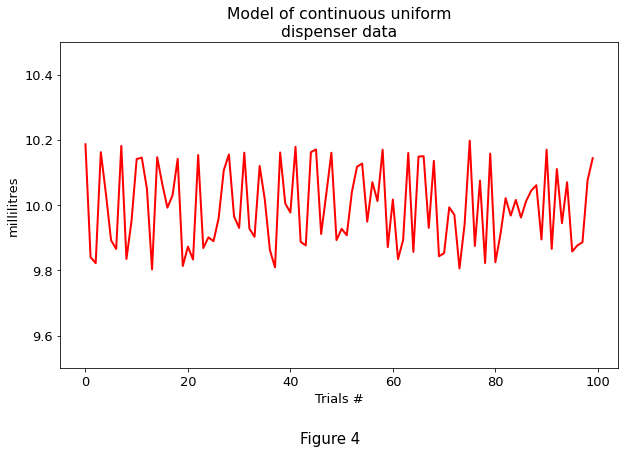

In [8]:
uniform_array = rng.uniform(9.8, 10.2, 100)                  # define normal array between wanted range
trial_range = np.arange(0, 100, 1)                           # define x_axis array (trial #)

fig, ax = plt.subplots()
plt.figtext(0.5, - 0.05, 'Figure 4', wrap = True, horizontalalignment = 'center', fontsize = 15) 
ax.plot(trial_range, uniform_array, linewidth = 2, color = 'r')
ax.set_title('Model of continuous uniform\ndispenser data')
ax.set_xlabel('Trials #')
ax.set_ylabel('millilitres')
ax.set_ylim([9.5, 10.5]);

<br>

#### Normal distribution 
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)


##### Function Usage
*Syntax: random.Generator.normal(loc = 0.0, scale = 1.0, size = None)* <br>

This function draw random samples from a Guassian (normal) distribution. It accepts 3 parameters:
- *loc*: this is the mean or centre of the normal distribution.
- *scale*: this is the standard deviation or spread of the distribution.
- *size*: shape of output array in the form of number of samples : number of arrays.



##### Distribution Description
The shape of the distribution resembles that of a bell shape curve and as per Barai (2020), some of its key chracteristics include: <br>

- Continuous  distribution, one local maximum in centre of distribution where the variables spread evenly from this mode.<br>
- Symmetric about the mean, whereby a perfect normal distribution has the same mean, median and mode (this will be explored later).
- The Standard Normal Distribution (mean = 0, standard deviation = 1) has defined data spread:
    - 68.3 % of data falls withing one std devs of the mean.
    - 99.7 %  of data falls withing three std devs of the mean.

The normal distribution can be described by its mean and standard deviation, whereby the probability of being selected rises as you approach the mean and spread<br>
increases with standard deviation, thereby effecting the heaviness of the distribution tails (kurtosis)[8]. See *Figure 5* below for exploration of how the standard<br>
normal distribution changes with different mean and std dev values.

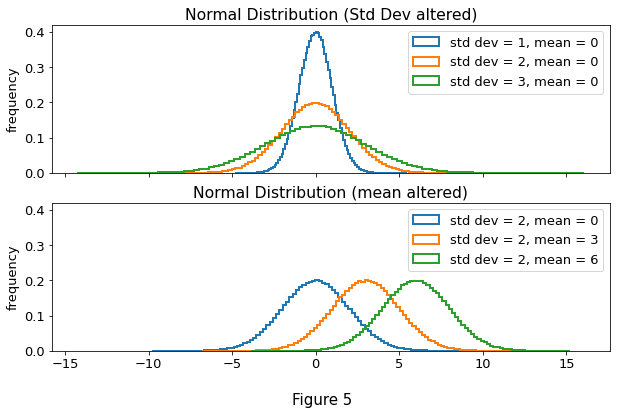

In [9]:
def plot_normal_distributions(axis_check, mean, std_dev):   
    # pass mean, std dev and number of runs into generator.normal function
    normal_array = rng.normal(mean, std_dev, 1000000)      
    
    # plot code for axis1
    if axis_check == 'axis_1':
        ax1.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, 
                    label = "std dev = " + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax1.set_title('Normal Distribution (Std Dev altered)')
        ax1.set_ylabel('frequency')
        ax1.legend(loc = 'upper right')
        
    else:
    # plot code for axis2
        ax2.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, label = "std dev = " \
                 + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax2.set_title('Normal Distribution (mean altered)')
        ax2.set_ylabel('frequency')
        ax2.legend(loc ='upper right')

        
        
# generate 2 subpots and pass axis_check, mean and std dev to plotting function        
Fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True)
plt.figtext(0.5, 0.0, 'Figure 5', wrap = True, horizontalalignment = 'center', fontsize = 15)

# pass diff mean and std dev values to function
plot_normal_distributions('axis_1', mean = 0, std_dev = 1)
plot_normal_distributions('axis_1', mean = 0, std_dev = 2)
plot_normal_distributions('axis_1', mean = 0, std_dev = 3)
plot_normal_distributions('axis_2', mean = 0, std_dev = 2)
plot_normal_distributions('axis_2', mean = 3, std_dev = 2)
plot_normal_distributions('axis_2', mean = 6, std_dev = 2)

plt.show()


<br>

##### Probability Density Function

The numPy normal generator will now be used to generate a standard normal distribution array which will be plotted. The array will be plotted on a histogram <br>
and each bin (x data point) will be passed as a paramater to the normal proability distribution function to yield the corresponding y data point and eventually a lineplot.<br>
The closeness of the mean, median and mode will also be confirmed.


<h3>PDF (normal): &nbsp;  $P(x)=\frac{1}{\sqrt{2πσ^2}}{e^\frac{(x-µ)^2}{2σ^2}}$ <h3>


           This plot shows that the data generated by the np.normal distribution
           function aligns with the data generated by the probability density
           function for a Gaussian distribution. Also the input values for the
           mean & std dev (0 & 1) closely resemble the output values in the
           generated array showing an accuracy of 0.1 - 0.2 %. The slight
           error makes sense as the model is performing random sampling.



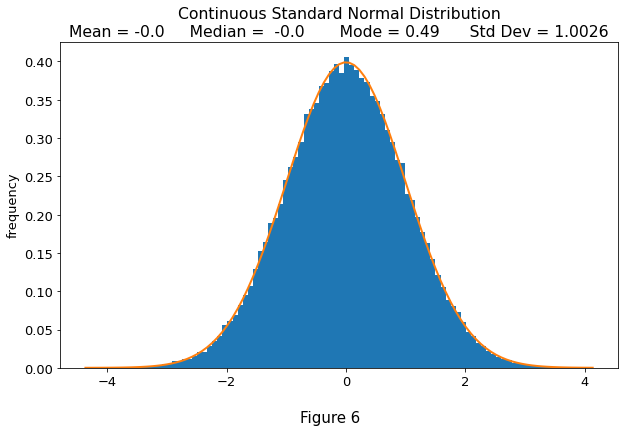

In [10]:
# plot Continuous Standard Normal Distribution 
# define variables
mean = 0
std_dev = 1

# generate normal array 
normal_array = rng.normal(mean, std_dev, 100000)

# plot histogram given normal array 
fig, ax = plt.subplots()
count, bins, ignored = plt.hist(normal_array, 100, density = True)
plt.figtext(0.5, 0.0, 'Figure 6', wrap = True, horizontalalignment = 'center', fontsize = 15) 

# define probability density function (equation shown in PDF1 below)
f = 1 /(std_dev * np.sqrt(2 * np.pi)) * np.exp(-(bins - mean) ** 2 / (2 * std_dev ** 2))

# calc 4x stats for normal curve
mean = round(statistics.mean(normal_array), 3)
median = round(statistics.median(normal_array), 3)
mode = round(statistics.mode(normal_array), 3)
std_dev = round(np.std(normal_array), 4)

# plot probability density line
plt.plot(bins, f, linewidth = 2);                     
plt.ylabel('frequency');    
plt.title('Continuous Standard Normal Distribution\nMean = {}     Median =  {}       \
Mode = {}      Std Dev = {}'.format(mean, median, mode, std_dev)); 

# description for plot
string_spacer = [' ' * 11 for i in range(7)]
print('\n{}This plot shows that the data generated by the np.normal distribution\n\
{}function aligns with the data generated by the probability density\n\
{}function for a Gaussian distribution. Also the input values for the\n\
{}mean & std dev (0 & 1) closely resemble the output values in the\n\
{}generated array showing an accuracy of 0.1 - 0.2 %. The slight\n\
{}error makes sense as the model is performing random sampling.\n'.format(*string_spacer))


##### Modelling Real World Data

The Normal distribution is considered one of the most important of the probability distributions in statistics. This distribution occurs in many real wold phenomena<br>
such as age,height, test-scores, IQ scores, men's height etc. Sharama (2019) helps explain this by describing how larger data sets with finite variances and independent<br>
feature probabilities will have a data distribution that favours the bell curve shape.<br>

The numPy normal function will now be used to model men's height and the results will be compared to that of a real world dataset. The mean and standard deviation <br>
parameters that will be passed into the normal function will be obtained from the dataset. <br>

**Scenario 1: Continuous normal distribution:** <br>
Model men's height based on real data.

In [11]:

# read in mens height data to numpy array
# url reference to zip file: https://www.kaggle.com/mustafaali96/weight-height/download

read_path = r'numpy_data_sets\weight-height.csv'             # define read path for real world data
df = pd.read_csv(read_path)                                  # read in csv file
df = df.loc[df.loc[:, 'Gender'] == 'Male']                   # filter gender by male
male_heights = df['Height']                                  # isolate height column
male_height_mean = np.mean(male_heights)                  # calc mean for normal plot
male_height_std_dev = np.std(male_heights)                # calc std dev for normal plot

print('Average male heights in inches = {}'.format(round(male_height_mean, 2)))
print('Std Dev. of male heights = {}'.format(round(male_height_std_dev, 2)))
print('Observiations = {}'.format(len(male_heights)))

Average male heights in inches = 69.03
Std Dev. of male heights = 2.86
Observiations = 5000


In [12]:

# Draw random samples from a normal (Gaussian) distribution passing the mean
# and std dev. from the real world dataset along with the same number of records
normal_array = rng.normal(male_height_mean, male_height_std_dev, 5000)      


           Both plots show skew & kurtosis values close to zero showing how
           normal both distributions are. Interestingly the real world world
           data values deviate further from zero than the numpy data which 
           makes sense as the normal package samples from a normal distribution
           and the real world data tends towards a normal distribution. The real
           world data shows a more negative skew as slightly more data is
           concentrated on right hand side. The kurtosis of the real world
           sample is slightly positive as the tails contain slightly more
           data than that of a perfectly normal distribution.



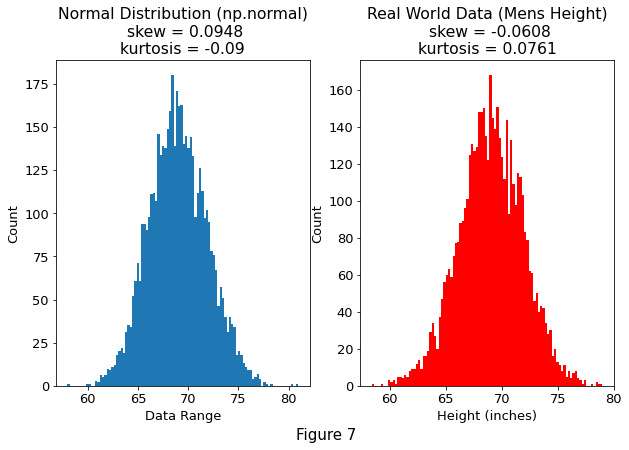

In [13]:
## convert normal array to pandas series
normal_series = pd.Series(normal_array)                            

# calc skew & kurtosis for numpy and real world array
normal_skew = round(normal_series.skew(), 4)
normal_kurtosis = round(normal_series.kurtosis(), 4)
male_heights_skew = round(male_heights.skew(), 4) 
male_heights_kurtosis = round(male_heights.kurtosis(), 4)

Fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey = False)
plt.figtext(0.5, 0, 'Figure 7', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.hist(normal_array, bins = 100, linewidth = 2.0, density = False) 
ax2.hist(male_heights, bins = 100, linewidth = 2.0, density = False,  color = "red") 

ax1.set_xlabel('Data Range')
ax1.set_ylabel('Count')
ax1.set_title('Normal Distribution (np.normal)\n skew = {}\nkurtosis = {}'
              .format(normal_skew, normal_kurtosis))

ax2.set_xlabel('Height (inches)')
ax2.set_ylabel('Count')
ax2.set_title('Real World Data (Mens Height)\n skew = {}\nkurtosis = {}'
              .format(male_heights_skew, male_heights_kurtosis))

# description for plot
string_spacer = [' ' * 11 for i in range(10)]
print('\n{}Both plots show skew & kurtosis values close to zero showing how\n\
{}normal both distributions are. Interestingly the real world world\n\
{}data values deviate further from zero than the numpy data which \n\
{}makes sense as the normal package samples from a normal distribution\n\
{}and the real world data tends towards a normal distribution. The real\n\
{}world data shows a more negative skew as slightly more data is\n\
{}concentrated on right hand side. The kurtosis of the real world\n\
{}sample is slightly positive as the tails contain slightly more\n\
{}data than that of a perfectly normal distribution.\n'.format(*string_spacer))



<br>

**Scenario 2: Discrete normal distribution (using np.integers function)**<br>
Model the sum of dice throws.

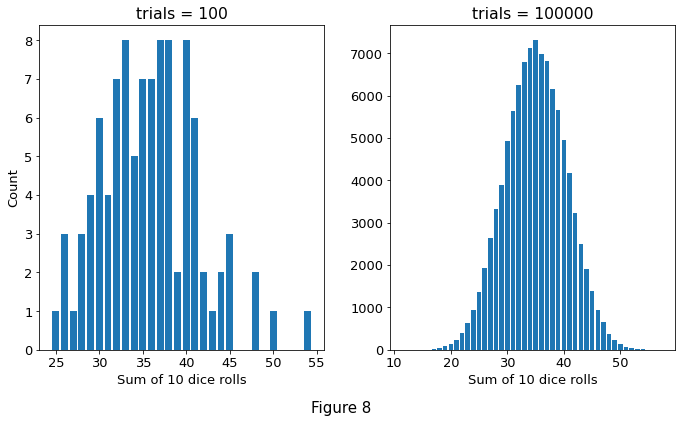

In [14]:

# model the results of summing 10 dice rolls across n trials
    # This shows how random processes can tend towards a discrete 
    # normal distribution when the dataset is large enough

def plot_bar_twice(roll_low, roll_high):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.figtext(0.5, 0, 'Figure 8', wrap = True, horizontalalignment = 'center', fontsize = 15); 
    ax1.bar(roll_low[0], roll_low[1])
    ax2.bar(roll_high[0], roll_high[1])
    
    ax1.set_title('trials = 100')
    ax1.set_xlabel('Sum of 10 dice rolls')
    ax1.set_ylabel('Count')
    ax2.set_title('trials = 100000')
    ax2.set_xlabel('Sum of 10 dice rolls')
  
    plt.tight_layout(pad = 2)
    plt.show()

def sum_dice_rolls(num_dice, num_turns):
    dice = rng.integers(1, 7, (num_turns, num_dice))               # generate ints from 0-6 in (n * n darray)
    totals = np.sum(dice, axis = 1)                                # sum dice along rows
    faces, counts = np.unique(totals, return_counts = True)        # unique count to faces variable
    return faces, counts ,num_dice, num_turns                      # return tuple for each array

less_trials = sum_dice_rolls(num_dice = 10, num_turns = 100)
more_trials = sum_dice_rolls(num_dice = 10, num_turns = 100000)
plot_bar_twice(less_trials, more_trials)




#### Binomial distribution
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial)

##### Function Usage
Syntax: random.Generator.binomial(n, p, size=None)

This function draw random samples from a binomial  distribution. It accepts 3 parameters:
- *n*: this is the number of trials.
- *p*: this is the probability of success for each trial.
- *size*: shape of output array in the form of number of samples : number of arrays.


##### Distribution Description

This is a discrete distribution made up of a collection of Bernoulli events, i.e a collection of binary events where each event has two modes (failure and success).<br>
The distribution models the successes based on the number of trials ran and the probability (p) of individual event success. Peng (2020) highlights how the the individual<br> 
events are independent from one another where the results of next event are not effected by the previous event, this is due to the model resamping on successive trials.<br>

As demonstrated in *Figure 9* below the shape of the distribution alters with the number of trials ran and the probability of trial success. When the trial count is of<br>
sufficient scale the distribution appears as a left skewed bell curve when p <0.5 and a right skewed bell curve when p >0.5. A normal bell curve shape is obtaiend when:
- The number of trials ran is large.
- The probability of success is close to 0.5.

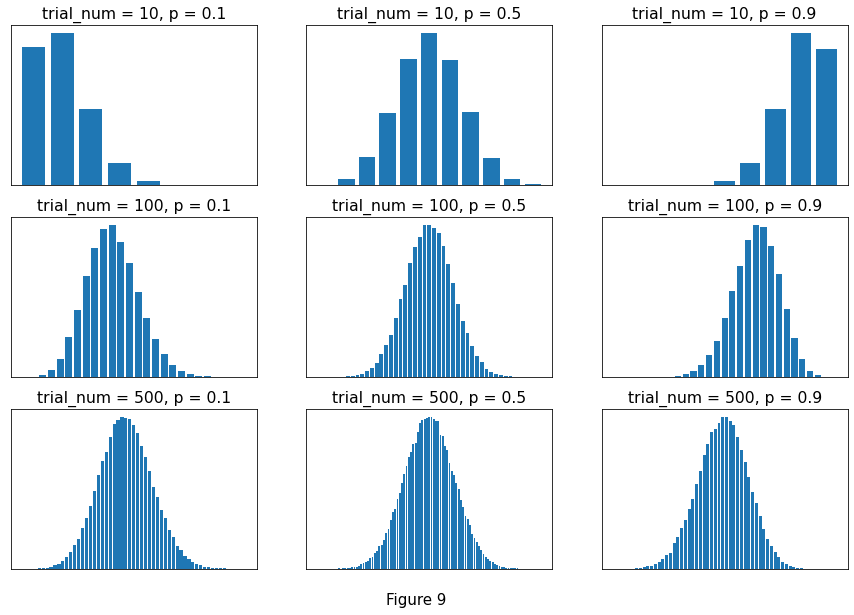

In [15]:
# define 2x tuples for inputs to binomial array function
trial_num_tuple = (10, 10 ,10, 100, 100 ,100, 500 ,500 ,500)
probability_tuple = (0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9, 0.1, 0.5 ,0.9)

# generate nested array using pre defined tuples 
array = rng.binomial(trial_num_tuple,  probability_tuple, (100000, 9))

# create figure (3x3 grid)
fig, ax = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (15, 10))
plt.figtext(0.5, 0.075, 'Figure 9', wrap = True, horizontalalignment = 'center', fontsize = 15); 

def plot_multi_array(array, plot_ref, trial_num, probability): 
    # return unique values and their respective counts
    x, y = np.unique(array, return_counts = True)  
    
    # use sub plot ref for plots
    subplot_title = 'trial_num = {}, p = {}'.format(trial_num, probability)
    ax[plot_ref].set_title(subplot_title)
    ax[plot_ref].set_xticks([])
    ax[plot_ref].set_yticks([]) 
    ax[plot_ref].bar(x, y)


sub_plot_index_list = []
# generate 3d (3 x 3) array  
arr = np.arange(27).reshape(3,3,3)

# iterate over 3d array and return tuple of indices and append to list
for idx in np.ndindex(arr.shape[:2]):    
        sub_plot_index_list.append(idx)
      
    # use 1 - 9 to index the array, sub_plot_index_list and binomial tuples
    # the subplots index list will determine which axis in the 3x3 grid will be used
for index in range(9):
    plot_multi_array(array[:, index], sub_plot_index_list[index], trial_num_tuple[index], probability_tuple[index])  


##### Probability Mass Function
<h3>$P(N)={n \choose N}{p^N}{(1-p)}^{n-N}$ <h3>

In [16]:

# test the numPy binomial function vs. probability mass function
trial_num = 10
p = 0.8             # 80 % probability of success

In [17]:
# generate binomial array using numPy 
binom_array = rng.binomial(trial_num, p, 100000)

In [18]:
# implement probability mass function
from scipy.stats import binom

successes_dict = {'successes': list(range(0, trial_num + 1))}     # make dict for trial number range
p_check_table = pd.DataFrame(successes_dict)                      # generate table from dict
prob = lambda x:binom.pmf(x, trial_num, p)                        # define lamda function to apply pmf
p_check_table['prob'] = p_check_table['successes'].apply(prob)    # apply pmf to successes column


           Trials = 10 for both sub plots, probability of success in each trial
           is 80 %. Sub plot 1 used numPys binomial function to generate an
           array of trial success counts. Sub plot 2 applied the probability
           mass function to the trial range to return the probability of
           success for each trial. The probabilites shown in sub plot 2 align
           with results obtained in subplot 1, where trials with the highest
           probability of success did succeed more.



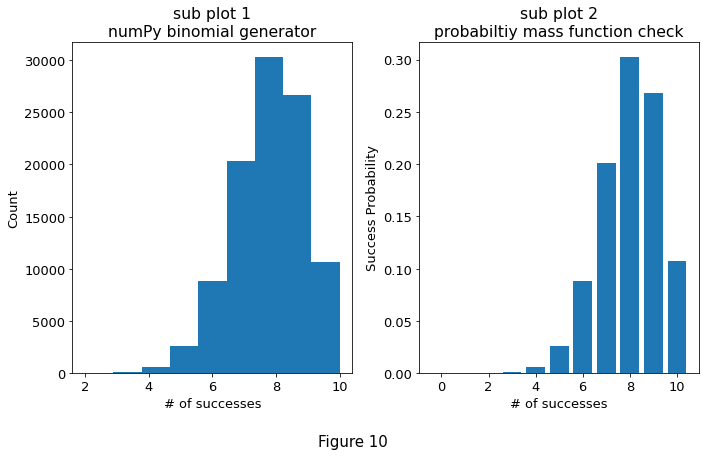

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figtext(0.5, -0.05, 'Figure 10', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.hist(binom_array, bins = 9)
ax2.bar(p_check_table['successes'], p_check_table['prob'])

ax1.set_title('sub plot 1\nnumPy binomial generator')
ax1.set_xlabel('# of successes')
ax1.set_ylabel('Count')

ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('# of successes')
ax2.set_ylabel('Success Probability')
plt.tight_layout()


# description for plot
string_spacer = [' ' * 11 for i in range(8)]
print('\n{}Trials = 10 for both sub plots, probability of success in each trial\n\
{}is 80 %. Sub plot 1 used numPys binomial function to generate an\n\
{}array of trial success counts. Sub plot 2 applied the probability\n\
{}mass function to the trial range to return the probability of\n\
{}success for each trial. The probabilites shown in sub plot 2 align\n\
{}with results obtained in subplot 1, where trials with the highest\n\
{}probability of success did succeed more.\n'.format(*string_spacer))


##### Modelling Real World Data

Hessing (2019) describes how any real world scenario's can be modelled if they obey the following criteria: 

The model must have:
1. Fixed trials that can not be altered during course of analysis
2. Independent trials where results from one trial will not effect result of another trial
3. Fixed probability of success accross all trials
4. Two mutually exclusive outcomes for each trial

**Scenario:** <br>
Model a Call Centre's annual profit distribution based on different call convertion success rates.

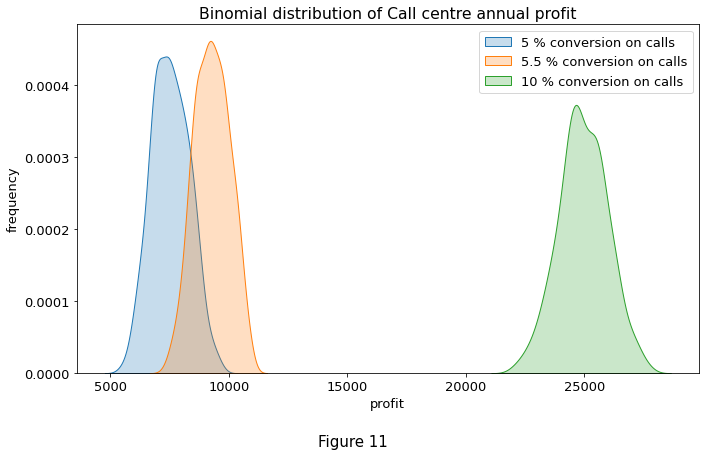

In [20]:
# adopted from: https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

def model_call_centre(p):
    
    staff_count = 100
    daily_wage = 100      
    daily_call_count = 100          
    revenue_per_call = 35
    
    # generate binomial array using daily stats and sum for each day of year
    array = [np.sum(rng.binomial(daily_call_count, p, size = staff_count)) for i in range(366)]
    # multiple array by costing status to get profit array
    profit = np.array(array) * revenue_per_call - staff_count * daily_wage
    
    col_name = 'p = {}'.format(p)
    s = pd.Series(profit, name = col_name)    
    # return array as a series 
    return s

# call function to generate arrays based on diff probability values
call_centre_low = model_call_centre(p = 0.05)    
call_centre_medium = model_call_centre(p = 0.055)   
call_centre_high = model_call_centre(p = 0.1) 

Fig, ax = plt.subplots()
plt.figtext(0.5, -0.05, 'Figure 11', wrap = True, horizontalalignment = 'center', fontsize = 15); 
sns.kdeplot(data = call_centre_low, label = '5 % conversion on calls',fill = True, 
            common_norm = True, linewidth=1,)

sns.kdeplot(data = call_centre_medium, label = '5.5 % conversion on calls', fill = True,
            common_norm = True, linewidth=1,)

sns.kdeplot(data = call_centre_high, label = '10 % conversion on calls', fill = True,
            common_norm = True, linewidth=1,)

ax.title.set_text('Binomial distribution of Call centre annual profit')
ax.set_xlabel('profit')
ax.set_ylabel('frequency')
plt.legend()
plt.tight_layout();


#### Hypergeometric distribution
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.hypergeometric.html) <br>

##### Function Usage
*Syntax: random.Generator.normal(ngood, nbad, nsample, size=None)* <br>

This function draws random samples from a Hypergeometric  distribution. It accepts 4 parameters:
- *ngood*: number of ways one can make a good selection.
- *nbad*: number of ways one can make a bad selection.
- *nsample*: number of items to be sampled (no larger than ngood + nbad).
- *size*: shape of output array in the form of number of samples : number of arrays.


##### Distribution Description

This is a discrete distribution that is very similar to the binomial distribution, but it doesnt measure the probability of a single success. A binomial experiment<br>
requires that the probability of success be constant on every trial, whearas the hypergeometric model alteres the probability by removing the sample from the <br>
population on in successive trials [11].<br>

As demonstrated in *Figure 12* below the shape of the distribution resemble the normal distribtion without the skew of the binomial, this is again due to the binomial<br>
distribution re-sampling on successive trials. One can also see an increase in the mean of the distribution as the number of success possibilities and the number of<br>
samples taken from the population increases.

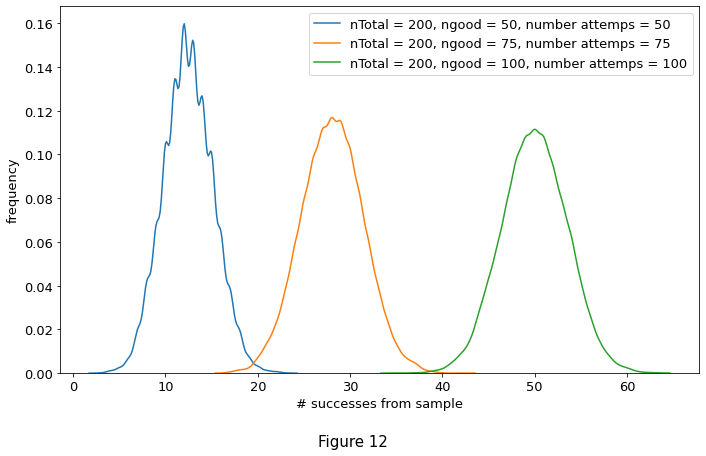

In [21]:
# pass tuples of 3 elements into hypergeometric function to model 3 scenarious, 10000 runs x3 arrays
binomial_multi_array = rng.hypergeometric((50, 75, 100), (150, 125, 100), (50, 75, 100), (10000, 3))

# convert array to dataframe and label columns
df = pd.DataFrame(binomial_multi_array, columns = ['low', 'medium', 'high'])

fig, ax = plt.subplots()
plt.figtext(0.5, - 0.05, 'Figure 12', wrap = True, horizontalalignment = 'center', fontsize = 15)
sns.kdeplot(data = df, x = 'low', ax = ax, label = 'nTotal = 200, ngood = 50, number attemps = 50')
sns.kdeplot(data = df, x = 'medium',ax = ax, label = 'nTotal = 200, ngood = 75, number attemps = 75')
sns.kdeplot(data = df, x = 'high', ax = ax, label = 'nTotal = 200, ngood = 100, number attemps = 100')

ax.set_xlabel('# successes from sample')
ax.set_ylabel('frequency')
ax.legend()
plt.tight_layout()

##### Probability Mass Function
<h3>$P(x)=\frac{\binom{ngood}{x}\binom{b}{n - x}}{\binom{ngood + b}{n}}$ <h3>


                            Parameters for both sub plots:
           Total outcomes = 20, good outcomes = 7, bad outcomes = 13
           Total attempts at success = 12, model to be ran 10000 times.

           Subplot 1 used numPy hypergeometric function to generate an array
           of trail success counts. Sub plot 2 applied the probability
           mass function to the trial range to return the probability of
           success for each trial. The probabilites shown in sub plot 2 align
           with results obtained in subplot 1, where trials with the highest
           probability of success did succeed more.



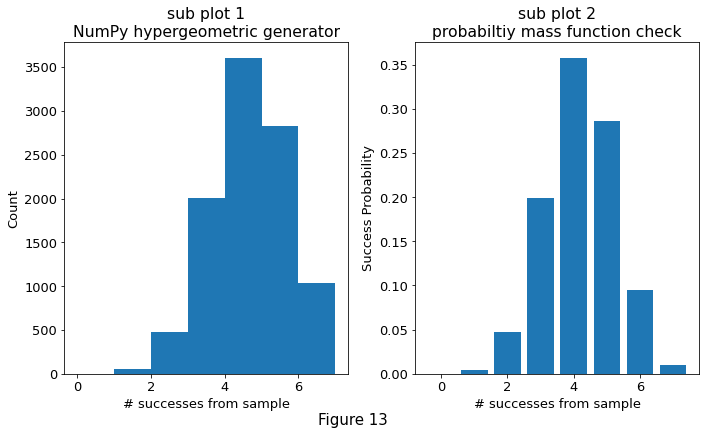

In [22]:
# test the numPy binomial function vs. probability mass function
    # Histogram used to model hypergeom depsite it being a discrete 
    # distribtion. (number of bins set to number successes)

from scipy.stats import hypergeom                                      
[M, n, N] = [20, 7, 12]
# M = total object count
# n = ngood
# N = number drawn from total population (no replacement)

rv_object = hypergeom(M, n, N)                               # generate hypergeom object using relevant paremeters
ngood_array = np.arange(0, n + 1)                            # generate array for total number of good objects
probability = rv_object.pmf(ngood_array)                     # call probability mass function on hypergeom object

# generate equivalent hyperg array using numpy
hyperg_array = rng.hypergeometric(7, 13, 12, 10000)         


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figtext(0.5, 0, 'Figure 13', wrap = True, horizontalalignment = 'center', fontsize = 15); 
ax1.hist(hyperg_array, bins = 7)                             
ax2.bar(ngood_array, probability)                            

ax1.set_title('sub plot 1\nNumPy hypergeometric generator')
ax1.set_xlabel('# successes from sample')
ax1.set_ylabel('Count')

ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('# successes from sample')
ax2.set_ylabel('Success Probability')
plt.tight_layout();

# description for plot
string_spacer = [' ' * 11 for i in range(10)]
print('\n{}                 Parameters for both sub plots:\n\
{}Total outcomes = 20, good outcomes = 7, bad outcomes = 13\n\
{}Total attempts at success = 12, model to be ran 10000 times.\n\n\
{}Subplot 1 used numPy hypergeometric function to generate an array\n\
{}of trail success counts. Sub plot 2 applied the probability\n\
{}mass function to the trial range to return the probability of\n\
{}success for each trial. The probabilites shown in sub plot 2 align\n\
{}with results obtained in subplot 1, where trials with the highest\n\
{}probability of success did succeed more.\n'.format(*string_spacer))

##### Modelling Real World Data

Any real world scenario that obey the follow criteria can be modelled using this distribution: <br>
The scenario must have; 
- Fixed number of trials or sampling events (discrete distribution).
- Two mutually exclusive outcomes for each trial (ngood and nbad).  
- Sample size that is a portion of the population. 
- Altering probability of success for sucessive trials (as no re-sampling occurs)[15]. 


**Scenario:**<br>
A factory makes 1000 parts a day. Average stats show that approx. 5% of the parts are defective. Quality Control want to find out how many parts they should<br>
inspect per day to monitor the manufacturing proccess. They want to make a model of how many defective part will be found based on their sample size.

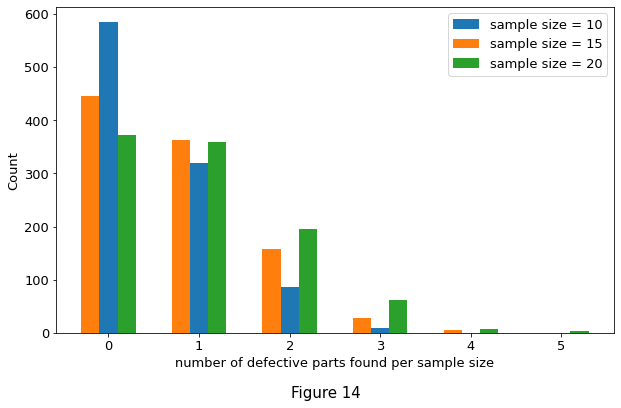

In [23]:
nruns = (1000, 3)
ngood = 1000 * 0.05      
nbad = 1000 -  ngood

nsample_low = 10
nsample_medium = 15
nsample_high = 20

# generate 2d array, will contain data relating to each hand 
all_hands = rng.hypergeometric((ngood, ngood, ngood), 
                               (nbad, nbad, nbad), 
                               (nsample_low, nsample_medium, nsample_high), nruns)

xone, yone = np.unique(all_hands[:,0], return_counts = True)
xtwo, ytwo = np.unique(all_hands[:,1], return_counts = True)
xthree, ythree = np.unique(all_hands[:,2], return_counts = True)

fig, ax = plt.subplots(sharex = False, sharey = False)
plt.figtext(0.5, -0.025, 'Figure 14', wrap = True, horizontalalignment = 'center', fontsize = 15); 

width = 0.2
ax.bar(xone, yone, width, label = 'sample size = 10')
ax.bar(xtwo - width, ytwo, width, label = 'sample size = 15')
ax.bar(xthree +  width, ythree, width, label = 'sample size = 20')

ax.set_xlabel('number of defective parts found per sample size')
ax.set_ylabel('Count')
plt.legend();


<br>

#### Poisson distribution
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) <br>


##### Function Usage
*Syntax: random.Generator.poisson(lam=1.0, size=None)* <br>

This function draws random samples from a poisson  distribution. It accepts 2 parameters:
- *lam*: Projected events to occur across fixed-time intervals (> 0).
- *size*: shape of output array in the form of number of samples : number of arrays.<br>


##### Distribution Description
This is a discrete distribution that models the probability of the number events occuring occurs in fixed interals (usually time). Koehrsen, 2020 describes the poisson<br>
process as a model for a series of discrete events where the average time between events is known, however the exact timing of the events are random. <br>

As demonstrated in Figure 15 below the shape of the Poisson distribution changes with the lamda (λ) value. A distribution with a low λ becomes positively skewed as the<br>
mode and mean approach zero, while the distirubtion with a higher λ resembles that of a normal distribution. It was also observed that when the binomial distirbution has<br>
a large number of trials and low probability of success (ref Fig. 9) one can compare the distribution to that of the poisson for medium and larger λ values.<br>

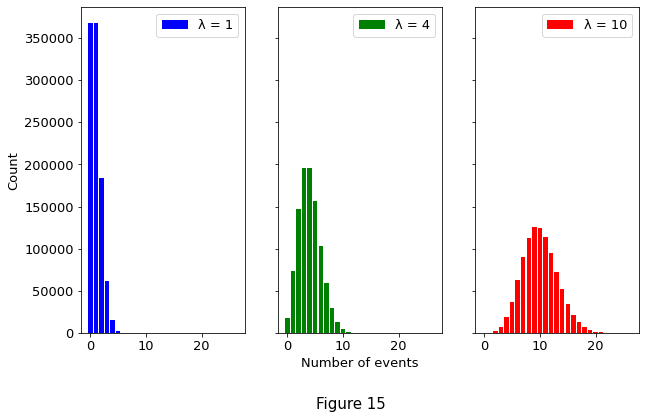

In [24]:
# generate 2d nested (3x) array using 1, 4 and 10 lamda values respectively
multi_array = rng.poisson(lam = (1, 4, 10), size = (1000000, 3))             

# isolate sub arrays
array_low = multi_array[:,0]
array_medium = multi_array[:,1]
array_high = multi_array[:,2]

# get unique values and counts 
unique_low, counts_low = np.unique(array_low, return_counts=True)
unique_medium, counts_medium = np.unique(array_medium, return_counts=True)
unique_high, counts_high = np.unique(array_high, return_counts=True)

fig, ax = plt.subplots(1, 3, sharex = True, sharey = True)
plt.figtext(0.5, -0.05, 'Figure 15', wrap = True, horizontalalignment = 'center', fontsize = 15)

ax[0].bar(unique_low, counts_low, label = 'λ = 1', color = 'blue')
ax[1].bar(unique_medium, counts_medium, label = 'λ = 4', color = 'green')
ax[2].bar(unique_high, counts_high, label = 'λ = 10', color = 'red')
ax[0].set_ylabel('Count')  
ax[1].set_xlabel('Number of events')   

# add legend to all subplots
for plot_index, ax in enumerate(fig.axes):  
    ax.legend()

##### Probability Density Function
<h2>&nbsp;  $f(k;λ)=\frac{λ^ke^-λ}{k!}$ <h2>


           Subplot 1 used numPys poisson function to model the expected number of events
           occuring in a fixed time period (with the mean of distrubtion at 5). Subplot 2
           uses probability mass function to obtain the probability of n events occuring
           in a fixed time period.The probabilites shown in sub plot 2 align with results
           obtained in subplot 1.
 


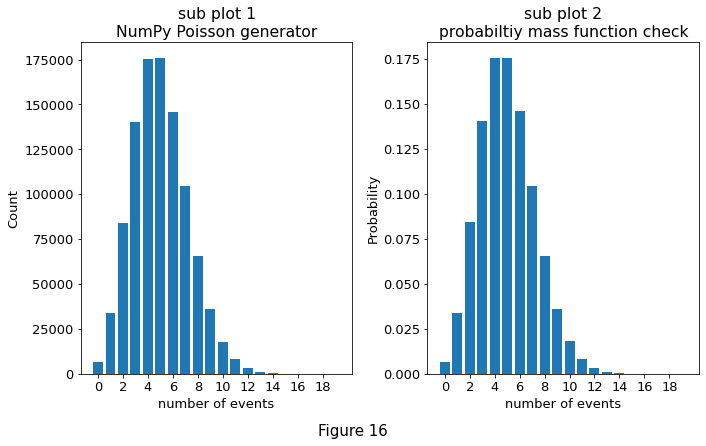

In [25]:
# compare numPy generated poisson distribution to probability mass function

from scipy.stats import poisson                                                   # library will use pmf later

array = rng.poisson(lam = (5), size = (1000000, 1))                               # generate 1d array, expected # events = 5
num_events_numpy, event_count = np.unique(array, return_counts = True)            # get unique values & counts


# implement probability mass function to describe probability
# of obtaining n successes during given time interval
mu = 5                                                                            # mean successes that occur during a specific interval                  
num_events_scipy = {'number of events': list(range(0, len(num_events_numpy)))}    # make dict for event number range
p_check_table = pd.DataFrame(num_events_scipy)                                    # generate table from dict
prob = lambda x:poisson.pmf(x, mu)                                                # define lamda function to apply pmf
p_check_table['prob'] = p_check_table['number of events'].apply(prob)             # apply pmf to numb event column


fig, (ax1, ax2) = plt.subplots(1, 2)
plt.figtext(0.5, - 0.025, 'Figure 16', wrap = True, horizontalalignment = 'center', fontsize = 15); 

ax1.bar(num_events_numpy, event_count)
ax2.bar(p_check_table['number of events'], p_check_table['prob'])   
ax1.set_title('sub plot 1\nNumPy Poisson generator')
ax1.set_xlabel('number of events')
ax1.set_ylabel('Count')
ax2.set_title('sub plot 2\nprobabiltiy mass function check')
ax2.set_xlabel('number of events')
ax2.set_ylabel('Probability')

# format xtick frequency from min to max # of array, and show every second number
ax1.set_xticks(np.arange(min(array), max(array), 2.0))
ax2.set_xticks(np.arange(min(array), max(array), 2.0))
plt.tight_layout();

# description for plot
string_spacer = [' ' * 11 for i in range(6)]
print('\n{}Subplot 1 used numPys poisson function to model the expected number of events\n\
{}occuring in a fixed time period (with the mean of distrubtion at 5). Subplot 2\n\
{}uses probability mass function to obtain the probability of n events occuring\n\
{}in a fixed time period.The probabilites shown in sub plot 2 align with results\n\
{}obtained in subplot 1.\n '.format(*string_spacer))


<br>

##### Modelling Real World Data
The Possion destribution has many real world applications. The model is used in probabilistic machine learning models such as the Genralized Linear model which<br>
is essentially a flexible version of the linear regression model [4]. The distribution can also help model many complex system over fixed time periods, such as<br>
weather events, network failures and website visitors per hour. 

Raji (2021) described the needed criteria to apply the model:
- The occurrence of one event does not affect the probability that a second event will occur, i.e: events occur independently.
- The average rate at which events occur is constant, i.e events per time period are constant.
- Two events cant occur at exactly the same time interval, if this is false one may be able to use the binomial distribution. 


**Scenario:**<br>
Company noticed an increase in mean website hits during weekend (from 3800 to 4000). They used the poisson distribution from numPy to model the data taking<br>
the increased traffic at weekends into account.

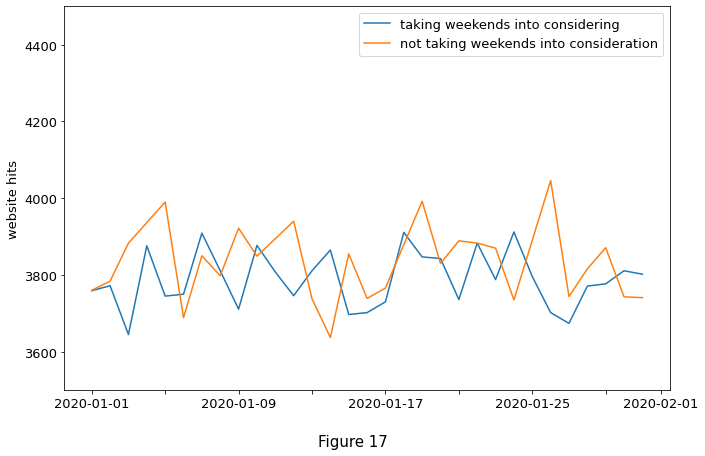

In [26]:
mean_week_hits = 3800
mean_weekday_hits = 3800
mean_weekend_hits = 4000

# generate time series column from 1st Jan 2021 to 31st Jan 2021
date_range = pd.date_range('1/1/2020', periods = 31, freq = 'D')       

#isolate weekdays & weekends into seperate time series
weekdays = date_range[date_range.dayofweek < 5]
weekends = date_range[date_range.dayofweek > 5]

# generate dataframes for all scenarios
df_all_days = pd.DataFrame(rng.poisson(mean_week_hits, len(date_range)), index = date_range, 
                           columns=['website hits'])

df_weekday = pd.DataFrame(rng.poisson(mean_weekday_hits, len(weekdays)), index = weekdays, 
                          columns=['website hits'])

df_weekend = pd.DataFrame(rng.poisson(mean_weekend_hits, len(weekends)), index = weekends, 
                          columns=['website hits'])

# merge weekday & weekend data back together and sort
frames = [df_weekday, df_weekend]
df_joined =  pd.concat(frames)
df_joined.sort_index()


fig , ax = plt.subplots()
plt.figtext(0.5, -0.05, 'Figure 17', wrap = True, horizontalalignment = 'center', fontsize = 15); 
sns.lineplot(data = df_all_days, x = df_all_days.index, y = "website hits", 
             label = 'taking weekends into considering')

sns.lineplot(data = df_joined, x = df_joined.index, y = "website hits", 
             label = 'not taking weekends into consideration')
 
# set y axis range and show legend
ax.set_ylim([3500, 4500])
ax.legend()
    
# make every other x tick invisible
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 2 != 0:
        label.set_visible(False)
        
plt.tight_layout()


<br>
<br>

### Pseudorandom Numbers and seeding

The *random* numbers generated by numPy and all computer algorithms are termed *pseudorandom* as they are generated by a definite process and are predictable.<br>
Baranwal (2018) describes how pseudorandom number generators (PRNG) produce number sequences that appear random but in reality are predictable. The PRNG or <br>
random bit generator is essentially an algorithm that uses a seed value to determine where the bitgenerator sequence starts. The psedorandom sequence generated<br>
eventually repeats as the algorithm reaches a previously used seed. The period before the number sequence repeats is controlled by the seed length, for example<br>
a seed of 3 digits means the alorithm can generate 1000 numbers before repitition of a sequence. The abiltiy to seed an algorithm and control the reproducibility<br>
of a dataset has many benifits, some of which are detailed by Bansal (2020):

- Reproducible splitting of data into training/validation/test sets for machine learning application.
- Reproducible training of non-deterministic algorithms (e.g random forest).
- Ability to benchmark results, for example if testing multiple algorithms its important that each one uses the same dataset.

The numPy documentation (version 1.21) details how this version uses PCG64 as its default bit generator and how a seed is used to initialize the bitgenerator. The<br>
seed can be passed as an integer or array of integers to the *default_rng()* constructor to instansiate a seeded object of the Generator Class. One can then call<br>
the different distribution functions on this object to return the same array multiple times. It it also important to note that if no seed it passed to the generator,<br>
numPy will apply its own seed based on the entropy of the operating system (e.g time, which constantly changes) and therefore output data that was generated using a<br>
different seed value.


In [27]:
# seed first object
rng_check = np.random.default_rng([2, 1])     

print('Default bit generator is {}\n'.format(rng_check))
print('Seeded Object1 generated this array = {}'.format(rng_check.integers(0, 9, 10)))
print('No seed generated this array = {}'.format(rng_check.integers(0, 9, 10)))

# seed new object
rng_check = np.random.default_rng([2, 1])        
print('Seeded Object2 generated the same array as Seeded object 1 = {}'
      .format(rng_check.integers(0, 9, 10)))

Default bit generator is Generator(PCG64)

Seeded Object1 generated this array = [2 8 2 7 1 1 0 8 8 0]
No seed generated this array = [0 4 4 0 8 6 7 0 2 0]
Seeded Object2 generated the same array as Seeded object 1 = [2 8 2 7 1 1 0 8 8 0]


<br>

#### Comparing Bit Generators
The PCG64 default bit generator (numPys default) will now be comapred to the MT19937 (Mersenne Twister), which was the default bit generator used in numPy's<br>
previous version. This legacy generator (RandomState) is now frozen but one can still use it to leverage the older methods used to generate random numbers from<br>
different distributions. The execution times and uniformity of data generated using both bit generators will now be explored further.<br>


In [28]:
# test execution times on both generators for:
    # generating 1 million integers & 1 million normally distributed floats 
    
import time
import random                        # RandomState (uses Mersenne Twister bit generator)

rng = np.random.default_rng()        # uses PCG64 bit generator

start = time.perf_counter()
pcg64_integers = rng.integers(0, 10, 1000000)
end = time.perf_counter()
pcg64_integers_diff = end - start
print('PCG64 took {} seconds to generate array with 1 million integers'
      .format(str("%.4f" % (end - start))))


start = time.perf_counter()
pcg64_n_floats = rng.normal(0, 1, 1000000)
end = time.perf_counter()
pcg64_n_floats_diff = end - start
print('PCG64 took {} seconds to generate array with 1 million normal floats'
      .format(str("%.4f" % (end - start))))


start = time.perf_counter()
mt_integers = np.random.randint(10, size = 1000000)
end = time.perf_counter()
MT19937_integers_diff = end - start
print('MT19937 took {} seconds to generate array with 1 million integers'
      .format(str("%.4f" % (end - start))))


start = time.perf_counter()
mt_n_floats = np.random.randn(1, 1000000)
end = time.perf_counter()
MT19937_n_floats_diff = end - start
print('MT19937 took {} seconds to generate array with 1 million normal floats'
      .format(str("%.4f" % (end - start))))


print('\nThe PCG64 bit generated integers {} % quicker on this run.'
      .format("%.2f" % ((pcg64_integers_diff / MT19937_integers_diff) * 100)))

print('The PCG64 bit generated normal floats {} % quicker on this run.'
      .format("%.2f" % ((pcg64_n_floats_diff / MT19937_n_floats_diff) * 100)))

PCG64 took 0.0058 seconds to generate array with 1 million integers
PCG64 took 0.0208 seconds to generate array with 1 million normal floats
MT19937 took 0.0193 seconds to generate array with 1 million integers
MT19937 took 0.0328 seconds to generate array with 1 million normal floats

The PCG64 bit generated integers 30.16 % quicker on this run.
The PCG64 bit generated normal floats 63.48 % quicker on this run.



           Both bit generators were used to generate integers from 0 to 1 million accross 10 trials. Its hard to see dis-similarities
           between the two methods when comparing the median, lower quartile and upper quartile of data distributions. The distributions
           look uniform all around as the average lies at circa. 500000, lower quartile at approx. 250000 and upper quartile at approx.
           750000 (where you would expect for a uniformly distribution sampleapplied



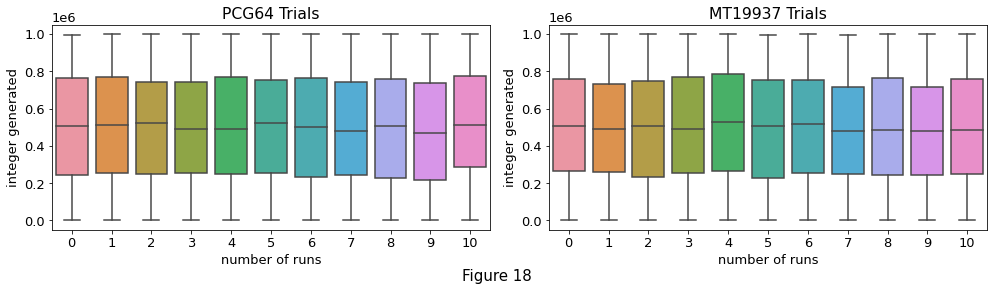

In [29]:
# compare the unifirmity of integers generated from both bit generators
rng = np.random.default_rng()       
pcg64_array = []  
mt_multi_array = []   

# generate 10 arrays for each method and append to list 
for i in range(11): 
    pcg64_integers = rng.integers(0, 1000001, 1000)
    pcg64_array.append(pcg64_integers)
    
    mt_integers = np.random.randint(1000001, size = 1000)
    mt_multi_array.append(mt_integers)                   

fig ,(ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
plt.figtext(0.5, 0, 'Figure 18', wrap = True, horizontalalignment = 'center', fontsize = 15); 
sns.boxplot(data = pcg64_array, ax = ax1)
sns.boxplot(data = mt_multi_array, ax = ax2)

ax1.set_title('PCG64 Trials')
ax1.set_xlabel('number of runs')
ax1.set_ylabel('integer generated')
ax2.set_title('MT19937 Trials')
ax2.set_xlabel('number of runs')
ax2.set_ylabel('integer generated')

plt.tight_layout();

# description for plot
string_spacer = [' ' * 11 for i in range(5)]
print('\n{}Both bit generators were used to generate integers from 0 to 1 million accross 10 trials. Its hard to see dis-similarities\n\
{}between the two methods when comparing the median, lower quartile and upper quartile of data distributions. The distributions\n\
{}look uniform all around as the average lies at circa. 500000, lower quartile at approx. 250000 and upper quartile at approx.\n\
{}750000 (where you would expect for a uniformly distribution sampleapplied\n'.format(*string_spacer))

<br>

### Discussion
#### Summary

<br>

The course of this project showed many of numPys useful functions and how to apply them. The benifits can be summarised as:

- Use of *Simple Random Data Functions* to:
    - Generate random integers or floats.
    - Randomly select elements from an array, with the option to control the probabiliy of the elements selected.
- Modifying the distribution of elements along the column or rows of multi-dimenstional arrays using permutation functions.
- Generating an array from many useful distributions with minimal input to the functions.
- Ability to model real world scenarios by careful selection of correct distribution function (i.e: the real world scenario must obey all criteria assumed by the distribution).
- Option to set the seed of the generators to ensure reproducibility generating the pseudorandom sequences.

<br>

#### Lessons Learned
**Overall:**<br>
Throughtout the course of this Project I learned a considerable amount about NumPy, its functions and also how to apply them to real world scenarios. NumPy is an<br>
extremely useful tool for performing rapid data operations, generating random numbers, manipulating array sequences and modelling real world scenarios via different<br>
data distributions.

**Extra:**<br>
This exercise highlighted to me how important it is to choose the most appropriate plot for a given dataset, for example use of histograms for discrete probability<br>
disributions gave me trouble early on and I tended towards bar charts to model these distributions as the project progressed. I also found it useful that numPy can<br> 
generate matrices which can then be indexed to generate subplots quite easily (Ref figure 9).

**Considerations:**<br>
With more time I would have researched how to quantitativly compare the uniformity of the numbers generated by the PCG64 and MT19937 bit generators. Lastly, I was<br> 
interested in the exponential distribution considering how it can be used alongside the possion distribution (to model the gaps between the fixed intervals) and would<br>
have liked to explore this more.<br>


<br>

### References

<br>

[1]. Barai, A, 2020, Normal Distribution and Machine Learning, medium.com,<br>
Available at: [Ref link 1](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070), (Accessed 10 November 2021).<br>

<br>           

[2]. Baranwal, P, 2018, PseudoRandom number generator, medium.com,<br>
Available at: [Ref link 2](https://medium.com/@palashbaranwal/pseudorandom-number-generator-52b0efc23fb8), (Accessed on: 20 November 2021).<br>

<br>

[3]. Bansal, J, 2020, How to Use Random Seeds Effectively, towards data science,<br> 
Available at: [Ref link 3](https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79), (Accessed 20 November 2021).<br>       

<br>

[4]. Bento, C, 2021, Poisson Process and Poisson Distribution in Real-Life, towards data science, <br>
Available at: [Ref link 4](https://towardsdatascience.com/poisson-process-and-poisson-distribution-in-real-life-modeling-peak-times-at-an-ice-cream-shop-b61b74fb812), (Accessed 18 November 2021).<br>

<br>

[5]. Billiau, S, 2021, From Scratch: Permutation Feature Importance for ML Interpretability, towards data science,<br>
Available at: [Ref link 5](https://towardsdatascience.com/from-scratch-permutation-feature-importance-for-ml-interpretability-b60f7d5d1fe9), (Accessed: 09 October 2021).<br>

<br>    

[6]. Brooks-Bartlett, J, 2018, What is a probability distribution?, towards data science,<br>
Available at: [Ref link 6](https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc), (Accessed 12 November 2021).<br>

<br> 

[7]. Calomme, V, 2017 , Why should the data be shuffled for machine learning tasks, StackExchange,<br>
Available at: [Ref link 7](https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks/24524#24524), (Accessed: 09 October 2021).<br>

<br> 

[8]. GADAADHAARIGEEK, 2019, What is a Normal (or Gaussian) Distribution?, kaggle.com,<br> 
Available at: [Ref link 8](https://www.kaggle.com/gadaadhaarigeek/normal-distribution), (Accessed 12 November 2021).<br>

<br>   

[9]. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362. <br>

<br>

[10]. Hessing, T, 2019, When Would You Use Binomial Distribution?, six sigma study guide,<br>
Available at: [Ref link 10](https://sixsigmastudyguide.com/binomial-distribution/), (Accessed 14 November 2021).

<br>   

[11]. John DeJesus, J, 2019, Hypergeometric Distribution Explained With Python, towards data science,<br>
Available at: [Ref link 11](https://towardsdatascience.com/hypergeometric-distribution-explained-with-python-2c80bc613bf4), (Accessed: 16 November 2021).

<br>           

[12]. Menon, V, 2021, Understanding Probability Distribution, medium.com,<br>
Available at: [Ref link 12](https://medium.com/swlh/understanding-probability-distribution-b5c041f5d564), (Accessed: 02 November 2021).<br>

<br>   

[13]. Alto, V, 2019, Combinatorics: permutations, combinations and dispositions, towards data science,<br>
Available at: [Ref link 13](https://towardsdatascience.com/combinatorics-permutations-combinations-and-dispositions-46604da34882), (Accessed: 09 November 2021).<br>

<br> 

[14]. Onnen, H, 2021, Python Scenario Analysis: Modeling Expert Estimates with the beta-PERT Distribution, towards data science,<br>
Available at: [Ref link 14](https://towardsdatascience.com/tagged/probability-distributions?p=22a5e90cfa79), (Accessed 12 November 2021).<br>

<br> 

[15]. Oracle Help Center, Hypergeometric Distribution,<br>
Available at: [Ref link 15](https://docs.oracle.com/cd/E57185_01/CYBUG/hypergeometric_distribution.htm), (Accessed: 21 Nov 2021).<br>

<br> 

[16]. Peng, T, 2020, Bernoulli and Binomial Distributions Explained, towards data science,<br>
Available at: [Ref link 16](https://towardsdatascience.com/tagged/binomial-distribution), (Accessed: 14 November 2021).<br>

<br> 

[17]. Raji, M, 2020, The Poisson Distribution, Assumptions and validity, medium.com,<br>
Availaible at: [Ref link 17](https://medium.com/analytics-vidhya/the-poisson-distribution-a061b0cd0221), (Accessed 19 Nov 2021).<br>

<br>   

[18]. Sharma, R, 2019, Gaussian distribution, towards data science,<br>
Available at: [Ref link 18](https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac), (Accessed 31 October 2021).<br>

<br> 

[19]. Soklaski, R, 2020, “Vectorized” Operations: Optimized Computations on NumPy Arrays,<br>
Available at: [Ref link 19](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html#), (Accessed: 21 October 2021).<br>

<br>

[20]. Tutorialspoint, 2021, NumPy Tutorial, <br>
Available at: [Ref link 20](https://www.tutorialspoint.com/numpy/index.htm), (Accessed: 21 October 2021).

<br>   

[21]. Koehrsen, W, 2019, The Poisson Distribution and Poisson Process Explained, Poisson Process, towards data science,<br>
Available at: [Ref link 21](https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459), (Accessed 18 November 2021).








